In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage as ndimage
from skimage.restoration import richardson_lucy

### Creating a sample image

(-0.5, 14.5, 14.5, -0.5)

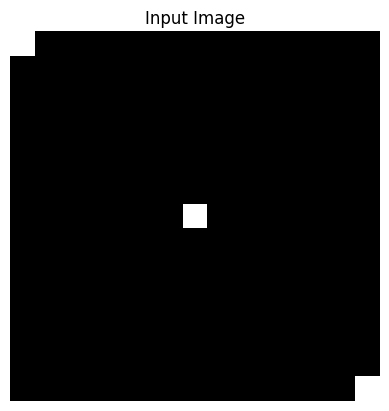

In [8]:
side = 15
x = np.zeros((side, side), dtype=np.float32)
x[0, 0] = 1.0
x[side//2, side//2] = 1.0
x[side-1, side-1] = 1.0
plt.imshow(x, cmap='gray')
plt.title('Input Image')
plt.axis('off')

### Creating the blur kernel (Gaussian)

(-0.5, 14.5, 14.5, -0.5)

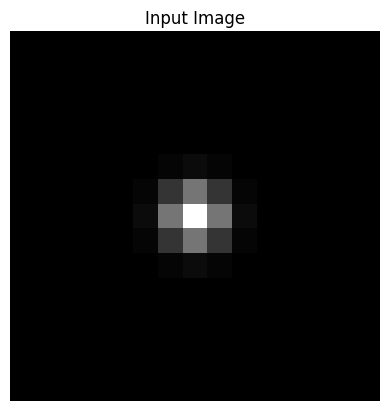

In [9]:
def gaussian_kernel(size, sigma):
    """Generates a Gaussian kernel."""
    # From ChatGPT
    ax = np.linspace(-(size // 2), size // 2, size)     # Create range of values centered around 0. len(ax) = size
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

psf = gaussian_kernel(side, sigma=0.8)
plt.imshow(psf, cmap='gray')
plt.title('Input Image')
plt.axis('off')

### Convolving Image with the blur kernel

15


(-0.5, 14.5, 14.5, -0.5)

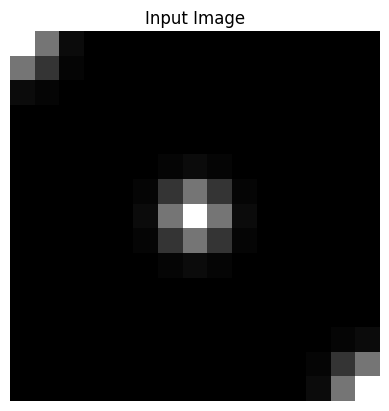

In [10]:
blurred = scipy.signal.convolve2d(x, psf, "same", boundary="fill", fillvalue=0.0)
print(len(blurred))
plt.imshow(blurred, cmap='gray')
plt.title('Input Image')
plt.axis('off')

### Perform Richardson Lucy Deconvolution

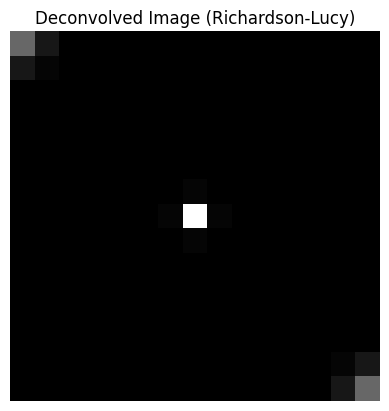

In [14]:
deconvolved = richardson_lucy(blurred, psf, num_iter=30)
plt.imshow(deconvolved, cmap='gray')
plt.title('Deconvolved Image (Richardson-Lucy)')
plt.axis('off')
plt.show()